## Implementation of Task1

In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import ignis
import numpy as np
from qiskit import Aer
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
from qiskit.aqua.components.optimizers import AQGD

In [2]:
from typing import List

class MyCircuit():
    def __init__(self, Ly_num: int, phi: List):
        self.Ly_num = Ly_num
        self.phi = phi
    
    def MyCost(self, x: List):
        lg = len(x)
        if(lg % 2 == 1): return -1
        theta_o = x[0:int(lg/2)]
        theta_e = x[int(lg/2):lg]
        
        if(self.Ly_num * 4 != len(theta_o) or self.Ly_num * 4  != len(theta_e)): return -1

        # Construct a circuit
        myqc = QuantumCircuit(4,2)

        for i in range(self.Ly_num):
            Layer(myqc, theta_o[4*i : 4 * i + 4], theta_e[4*i : 4 * i + 4])

        # To draw
#         myqc.draw(output='mpl', filename='my_circuit.png')
#         plt.show()
#         print(myqc)

        # Run the quantum circuit on a statevector simulator backend
        backend = Aer.get_backend('statevector_simulator')

        # Create a Quantum Program for execution
        job = qiskit.execute(myqc, backend)
        result = job.result()

        # output
        outputstate = result.get_statevector(myqc, decimals=5)

        # calculate distance
        dist = Dist(outputstate, self.phi)
        return dist



def Cost(Ly_num, theta_o: List, theta_e: List, phi: List):
    
    if(Ly_num * 4 != len(theta_o) or Ly_num * 4  != len(theta_e)): return -1

    # Construct a circuit
    myqc = QuantumCircuit(4,2)

    for i in range(Ly_num):
        Layer(myqc, theta_o[4*i : 4 * i + 4], theta_e[4*i : 4 * i + 4])
        
    myqc.draw(output='mpl', filename='my_circuit.png')
    plt.show()
    print(myqc)

    # Run the quantum circuit on a statevector simulator backend
    backend = Aer.get_backend('statevector_simulator')

    # Create a Quantum Program for execution
    job = qiskit.execute(myqc, backend)
    result = job.result()
    
    # output
    outputstate = result.get_statevector(myqc, decimals=5)
    
    # calculate distance
    dist = Dist(outputstate, phi)
    return dist

def Plot_rho(outputstate):
    plot_state_city(outputstate)


def Even_blocks(qc: QuantumCircuit, theta: List):
    lg = len(theta)
    lg_qc = qc.n_qubits
    if(lg != lg_qc): return
    
    for i in range(lg):
        qc.rz(theta[i], i)
        
    for i in range(lg - 1):
        for j in range(i + 1, lg):
            qc.cz(i, j)
    return

def Odd_blocks(qc: QuantumCircuit, theta: List):
    lg = len(theta)
    lg_qc = qc.n_qubits
    if(lg != lg_qc): return
    
    for i in range(lg):
        qc.rx(theta[i], i)
    return
    
def Layer(qc: QuantumCircuit, theta_o: List, theta_e: List):
    Odd_blocks(qc, theta_o)
    Even_blocks(qc, theta_e)
    return

    

def Dist(v1, v2)->float:
    lg1 = len(v1)
    lg2 = len(v2)
    if(lg1 != lg2): return -1
    
    ans = np.linalg.norm(abs(v1 - v2))
    return ans


##################

def MyOptimizer(Lyer_num, phi)->List:
    c = MyCircuit(Lyer_num, phi)
    
    x0 = np.zeros(8 * Lyer_num)
    mycost0 = c.MyCost(x0)
    print('cost0 = ', mycost0)
    
    # Calculate gradient
    s = AQGD(maxiter= 500, eta=0.8)

    # optimize
    result = s.optimize(8 * Lyer_num, c.MyCost, gradient_function = None, variable_bounds=None, initial_point=x0 )
    
    return result




In [3]:

# generate an arbitrary state
from random import*
phi = np.zeros(16, dtype = complex)
buf = 0
for i in range(16):
    phi[i] = random() + random() * 1j
    buf += abs(phi[i])**2
phi /= np.sqrt(buf)
print('\nphi = ', phi, '\n')

    


phi =  [0.02028168+0.01119596j 0.21772834+0.1242118j  0.24896595+0.23751685j
 0.15451236+0.21548788j 0.19406331+0.10044912j 0.06053239+0.25080864j
 0.01214387+0.25685086j 0.19708191+0.22064238j 0.24752157+0.12871876j
 0.042375  +0.12651454j 0.16213547+0.26485835j 0.12757956+0.04251901j
 0.25120959+0.04842543j 0.21927224+0.11638648j 0.14975286+0.10633072j
 0.24081764+0.22582253j] 



In [4]:
Lyer_List = range(1, 11)
dist_List = np.ones(len(Lyer_List))

for i in range(len(Lyer_List)):
    Lyer_num = Lyer_List[i]
    myresult = MyOptimizer(Lyer_num, phi)
    print(myresult)
    dist_List[i] = myresult[1]
    print('layer_num = ', Lyer_num, ', distance = ', myresult[1], '\n')

<ipython-input-2-635860454825>:90: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  lg_qc = qc.n_qubits
<ipython-input-2-635860454825>:77: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  lg_qc = qc.n_qubits


cost0 =  1.3997987834400805
(array([-1.55792168, -1.76824027, -1.82217021, -1.84704633, -0.07637215,
        0.3937889 , -0.01709395, -0.20464283]), 0.9708842608196145, 89)
layer_num =  1 , distance =  0.9708842608196145 

cost0 =  1.3997987834400805
(array([-1.650582  , -1.25209093, -1.75535555, -1.4598369 , -0.17759393,
       -3.3028386 , -0.17565858, -0.40829404,  2.67687235, -2.41819875,
        2.48662719,  0.34820718, -1.11007263, -0.60879479, -0.84638075,
        1.00556469]), 0.4044656016031866, 500)
layer_num =  2 , distance =  0.4044656016031866 

cost0 =  1.3997987834400805
(array([-1.5511137 , -0.24008487, -1.6970475 , -1.58420694, -0.2953178 ,
       -1.94795819, -0.01048141, -0.265746  ,  0.09863568, -1.51007427,
       -0.04652333, -0.21626151,  1.18867581,  1.51564408, -0.17071518,
       -0.55979677, -1.27744559, -1.51229813, -0.08233245,  0.41072116,
       -0.00659976,  0.20464118,  0.3158109 , -0.1276318 ]), 0.28880361967208545, 500)
layer_num =  3 , distance =  0.

In [5]:
## save text
np.savetxt('result2.txt', (Lyer_List, dist_List), delimiter=',') 

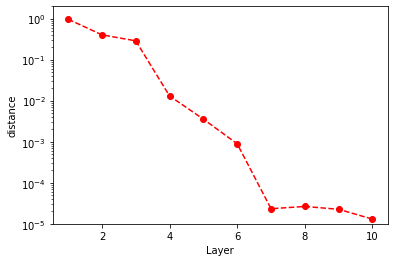

In [6]:
## load txt
data = np.loadtxt('result2.txt', delimiter=',') 

## save graph file
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data[0], data[1], 'ro--')
ax.set_ylim([1E-5, 2]) 
ax.set_yscale('log')
ax.set_xlabel('Layer')
ax.set_ylabel('distance')
plt.savefig('result2.pdf')
plt.show()

